In [73]:
import config
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [74]:
list(map(lambda x: x.stem, Path(config.exp_root).glob('*')))

['finetune_vgg11_monument_train80p',
 'finetune_vgg11_monument_train20p',
 'finetune_resnet18_monument_train80p',
 'finetune_resnet18_monument_train20p']

In [75]:
def read_exp(name):
    return pandas.concat([
        pandas.read_csv(p / 'log.csv')
        for p in ((config.exp_root / name).glob('trail_*'))
    ])

In [76]:
resnet20 = read_exp('finetune_resnet18_monument_train20p')
resnet80 = read_exp('finetune_resnet18_monument_train80p')

vgg20 = read_exp('finetune_vgg11_monument_train20p')
vgg80 = read_exp('finetune_vgg11_monument_train80p')

In [77]:
def plot_exp(ax, data, label):
    mean = data.groupby(data['epoch']).mean()[' val_Accuracy']
    std = data.groupby(data['epoch']).std()[' val_Accuracy']
    ax.plot(mean, label=label)
    ax.fill_between(np.arange(std.shape[0]) + 1, mean - 2*std, mean + 2*std, alpha=0.2)

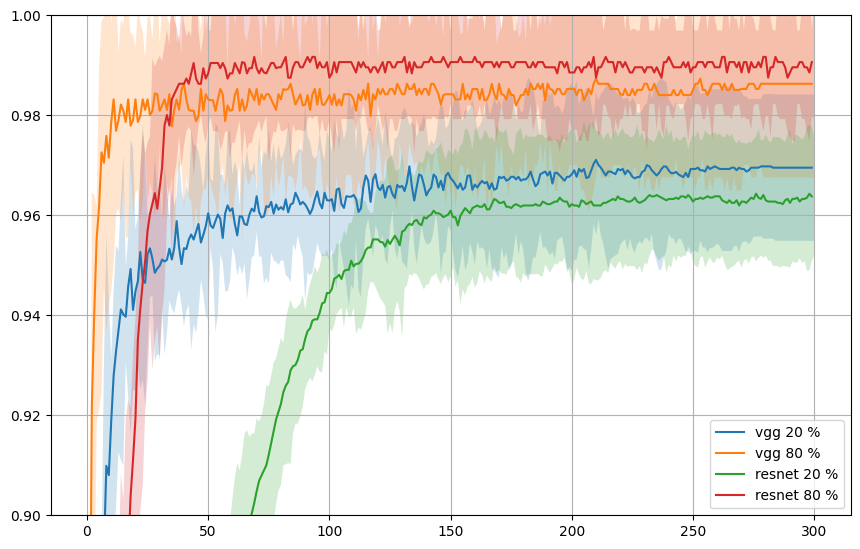

In [78]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([0.9, 1])
ax.grid()
plot_exp(ax, vgg20, 'vgg 20 %')
plot_exp(ax, vgg80, 'vgg 80 %')
plot_exp(ax, resnet20, 'resnet 20 %')
plot_exp(ax, resnet80, 'resnet 80 %')
ax.legend()

VGG11 performs slightly better than ResNet18 on the smaller training set and slightly worse on the larger training set. Although, in both cases the spread of training trails overlaps significantly. Overall VGG11 can be used for hebbian pre-training and gradient fine-tuning.